[*********************100%%**********************]  1 of 1 completed


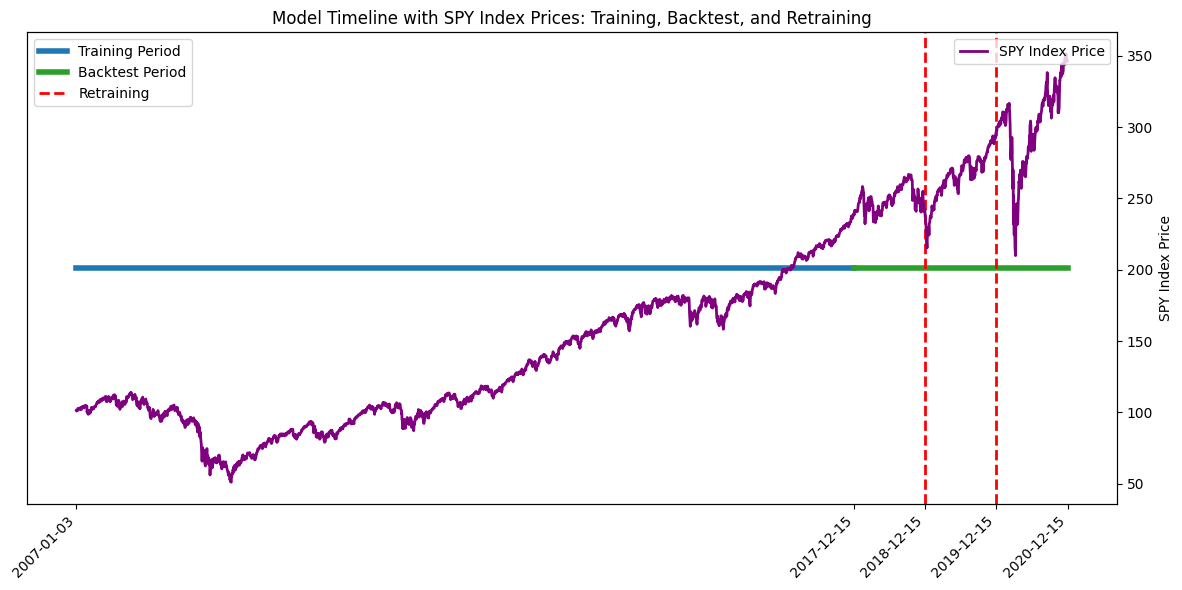

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

# Define the key dates
startdate = datetime(2007, 1, 3)
backtest_start_date = datetime(2017, 12, 15)
enddate = datetime(2020, 12, 15)
retrain_dates_corrected = [datetime(2018, 12, 15), datetime(2019, 12, 15)]

# Fetch SPY data from Yahoo Finance using yfinance
spy_data = yf.download('SPY', start=startdate.strftime('%Y-%m-%d'), end=enddate.strftime('%Y-%m-%d'))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SPY index prices on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(spy_data.index, spy_data['Adj Close'], color='purple', label='SPY Index Price', linewidth=2)
ax2.set_ylabel('SPY Index Price')
ax2.legend(loc='upper right')

# Main timeline for reference, subtle
ax1.plot([startdate, enddate], [1, 1], 'grey', linewidth=1, alpha=0.5)

# Training period
ax1.plot([startdate, backtest_start_date], [1, 1], '#1f77b4', label="Training Period", linewidth=4)

# Backtest period
ax1.plot([backtest_start_date, enddate], [1, 1], '#2ca02c', label="Backtest Period", linewidth=4)

# Retraining markers with vertical lines
for date in retrain_dates_corrected:
    ax1.axvline(x=date, color='red', linestyle='--', linewidth=2, label="Retraining" if date == retrain_dates_corrected[0] else "")

# Adjusting x-axis
ax1.set_yticks([])
ax1.set_xticks([startdate, backtest_start_date] + retrain_dates_corrected + [enddate])
ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, backtest_start_date] + retrain_dates_corrected + [enddate]], rotation=45, ha="right")

# Legend for the primary axis (timeline)
handles1, labels1 = ax1.get_legend_handles_labels()
by_label1 = dict(zip(labels1, handles1))
ax1.legend(by_label1.values(), by_label1.keys(), loc='upper left')

plt.title("Model Timeline with SPY Index Prices: Training, Backtest, and Retraining")
plt.tight_layout()
plt.show()


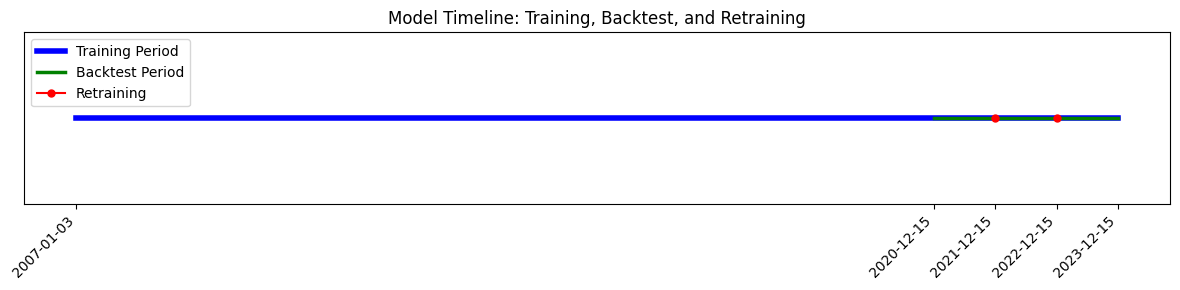

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

startdate = datetime(2007, 1, 3)
backtest_start_date = datetime(2020, 12, 15)
enddate = datetime(2023, 12, 15)
retrain_dates_corrected = [datetime(2021, 12, 15), datetime(2022, 12, 15)]



fig, ax = plt.subplots(figsize=(12, 3))
timeline_height = 1

# Main timeline for reference, subtle
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'grey', linewidth=1, alpha=0.5)

# Training period, using a vibrant color
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'blue', label="Training Period", linewidth=4)

# Backtest period starting marker, highlighted distinctly
ax.plot([backtest_start_date, enddate], [timeline_height, timeline_height], 'green', label="Backtest Period", linewidth=2.5)

# Retraining markers, making them stand out
for date in retrain_dates_corrected:
    ax.plot(date, timeline_height, 'red', marker='o', markersize=5, label="Retraining" if date == retrain_dates_corrected[0] else "")

# Adjusting x-axis
ax.set_yticks([])
ax.set_xticks([startdate, backtest_start_date] + retrain_dates_corrected + [enddate])
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, backtest_start_date] + retrain_dates_corrected + [enddate]], rotation=45, ha="right")

# Legend optimization
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title("Model Timeline: Training, Backtest, and Retraining")
plt.tight_layout()
plt.show()

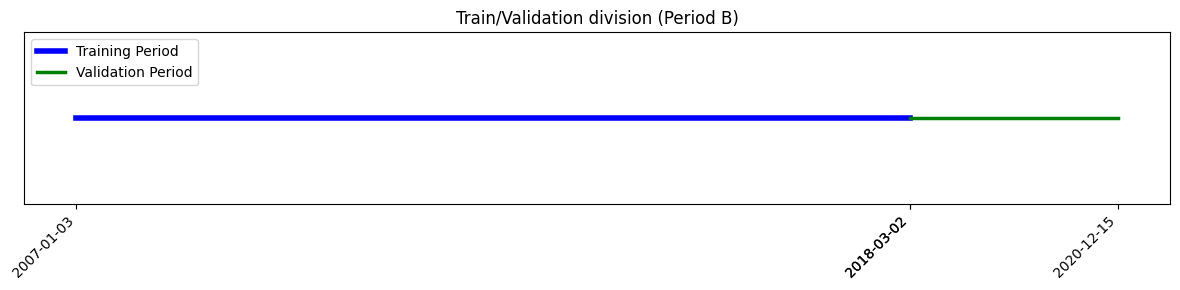

In [13]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Updated period
startdate = datetime(2007, 1, 3)
enddate = datetime(2020, 12, 15)

# Calculate total period length
total_period = enddate - startdate

# Calculate training and validation periods (80% for training, 20% for validation)
training_period_end = (startdate + timedelta(days=0.8 * total_period.days)).date()
validation_start_date =training_period_end

fig, ax = plt.subplots(figsize=(12, 3))
timeline_height = 1

# Main timeline for reference, subtle
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'grey', linewidth=1, alpha=0.5)

# Training period, using a vibrant color
ax.plot([startdate, training_period_end], [timeline_height, timeline_height], 'blue', label="Training Period", linewidth=4)

# Validation period, highlighted distinctly
ax.plot([validation_start_date, enddate], [timeline_height, timeline_height], 'green', label="Validation Period", linewidth=2.5)

# Adjusting x-axis
ax.set_yticks([])
ax.set_xticks([startdate, training_period_end, validation_start_date, enddate])
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, training_period_end, validation_start_date, enddate]], rotation=45, ha="right")

# Legend optimization
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title("Train/Validation division (Period B)")
plt.tight_layout()
plt.show()


[*********************100%***********************]  5 of 5 completed


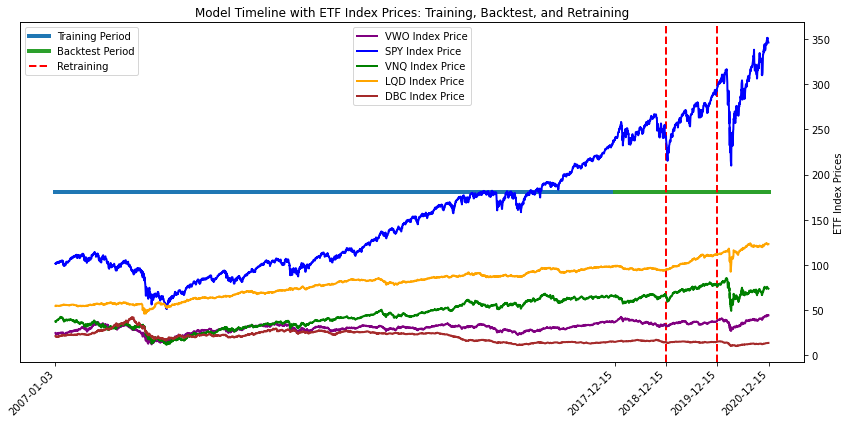

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

# Define the key dates
startdate = datetime(2007, 1, 3)
backtest_start_date = datetime(2017, 12, 15)
enddate = datetime(2020, 12, 15)
retrain_dates_corrected = [datetime(2018, 12, 15), datetime(2019, 12, 15)]

# ETF symbols
etfs = ['VWO', 'SPY', 'VNQ', 'LQD', 'DBC']

# Fetch data for the ETFs from Yahoo Finance using yfinance
data = yf.download(etfs, start=startdate.strftime('%Y-%m-%d'), end=enddate.strftime('%Y-%m-%d'))['Adj Close']

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot ETF index prices on a secondary y-axis
ax2 = ax1.twinx()
colors = ['purple', 'blue', 'green', 'orange', 'brown']  # Different color for each ETF
for etf, color in zip(etfs, colors):
    ax2.plot(data.index, data[etf], color=color, label=f'{etf} Index Price', linewidth=2)
ax2.set_ylabel('ETF Index Prices')
ax2.legend(loc='upper center')

# Main timeline for reference, subtle
ax1.plot([startdate, enddate], [1, 1], 'grey', linewidth=1, alpha=0.5)

# Training period
ax1.plot([startdate, backtest_start_date], [1, 1], '#1f77b4', label="Training Period", linewidth=4)

# Backtest period
ax1.plot([backtest_start_date, enddate], [1, 1], '#2ca02c', label="Backtest Period", linewidth=4)

# Retraining markers with vertical lines
for date in retrain_dates_corrected:
    ax1.axvline(x=date, color='red', linestyle='--', linewidth=2, label="Retraining" if date == retrain_dates_corrected[0] else "")

# Adjusting x-axis
ax1.set_yticks([])
ax1.set_xticks([startdate, backtest_start_date] + retrain_dates_corrected + [enddate])
ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, backtest_start_date] + retrain_dates_corrected + [enddate]], rotation=45, ha="right")

# Legend for the primary axis (timeline)
handles1, labels1 = ax1.get_legend_handles_labels()
by_label1 = dict(zip(labels1, handles1))
ax1.legend(by_label1.values(), by_label1.keys(), loc='upper left')

plt.title("Model Timeline with ETF Index Prices: Training, Backtest, and Retraining")
plt.tight_layout()
plt.show()
